In [20]:
import numpy as np
from matplotlib import pyplot as plt
import cn_utils as cn

# Introdução

Neste capítulo, apresentaremos os autovalores e autovetores que desempenham um papel muito importante em muitas aplicações em ciência e engenharia. O prefixo eigen- é adotado da palavra alemã eigen para "próprio", característico" e pode soar realmente abstrato e assustador no começo. Mas quando você começar a entendê-los, descobrirá que eles trazem muitos insights e conveniências para nossos problemas.

Eles têm muitas aplicações, para citar algumas, encontrar as frequências naturais e formas de modo em sistemas dinâmicos, resolver equações diferenciais (veremos em capítulos posteriores), reduzir as dimensões usando análise de componentes principais, obter as tensões principais na mecânica e em breve. Até mesmo o famoso algoritmo do mecanismo de busca do Google - PageRank, usa os autovalores e autovetores para atribuir pontuações às páginas e classificá-las na pesquisa.

Este capítulo ensina como usar algumas maneiras comuns de encontrar os autovalores e autovetores. No final deste capítulo, você deve entender o método power, o método QR e como usar o Python para encontrá-los.

Esse capitulo é baseado no excelente livro [Python Programming and Numerical Methods](https://pythonnumericalmethods.berkeley.edu/index.html).

## Discussão Matemática

Já vimos que aplicar a matriz $A$ ao vetor coluna $x$, que é $Ax$, é uma transformação linear de $x$. Existe uma transformação especial na forma a seguir:

$$
Ax = \lambda x
$$

Onde $A$ é uma matriz $n \times n$, $x$ é um vetor coluna $n \times 1 (x \neq 0)$, e $\lambda$ é algum escalar. Qualquer $\lambda$ que satisfaça a equação acima é conhecido como um **autovalor** da matriz $A$, enquanto o vetor associado $x$ é chamado de **autovetor** correspondente a $\lambda$.

A motivação por trás dos autovalores e autovetores é que nos ajuda a entender as características da transformação linear, facilitando assim as coisas. Sabemos que um vetor $x$ pode ser transformado em um vetor diferente multiplicando $A$, ou seja $Ax$. O efeito da transformação representa uma escala do comprimento do vetor e/ou a rotação do vetor. A equação acima aponta que para alguns vetores, o efeito de transformação de $Ax$ é apenas de escala (alongamento, compressão e inversão). Os autovetores são os vetores que possuem essa propriedade e os autovalores $\lambda$s são os fatores de escala. Vejamos o exemplo a seguir.


#### Exemplo:
Plota o vetor $x=[[1], [1]]$ e o vetor $b=Ax$ onde $A=[[2,0], [0,1]]$

In [21]:
plt.style.use('default')

def plot_vect(x, b, xlim, ylim):
    '''
    function to plot two vectors, 
    x - the original vector
    b - the transformed vector
    xlim - the limit for x
    ylim - the limit for y
    '''
    plt.figure(figsize = (10, 6))
    plt.quiver(0,0,x[0],x[1],\
        color='k',angles='xy',\
        scale_units='xy',scale=1,\
        label='Original vector')
    plt.quiver(0,0,b[0],b[1],\
        color='g',angles='xy',\
        scale_units='xy',scale=1,\
        label ='Transformed vector')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

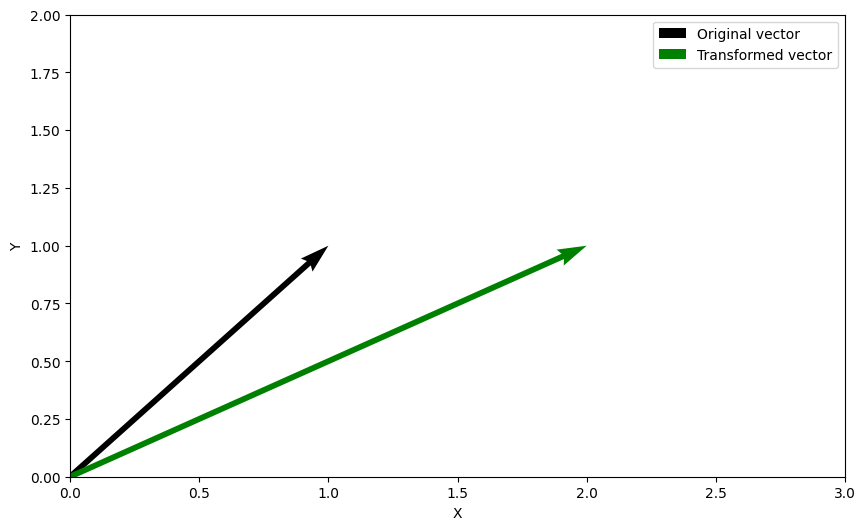

In [22]:
A = np.array([[2, 0],[0, 1]])

x = np.array([[1],[1]])
b = np.dot(A, x)
plot_vect(x,b,(0,3),(0,2))

Podemos ver pela figura gerada que o vetor original $x$ é girado e esticado por mais tempo depois de transformado por $A$. O vetor $[[1], [1]]$ é transformado em $[[2], [1]]$. Vamos tentar fazer o mesmo exercício com um vetor diferente $[[1], [0]]$.

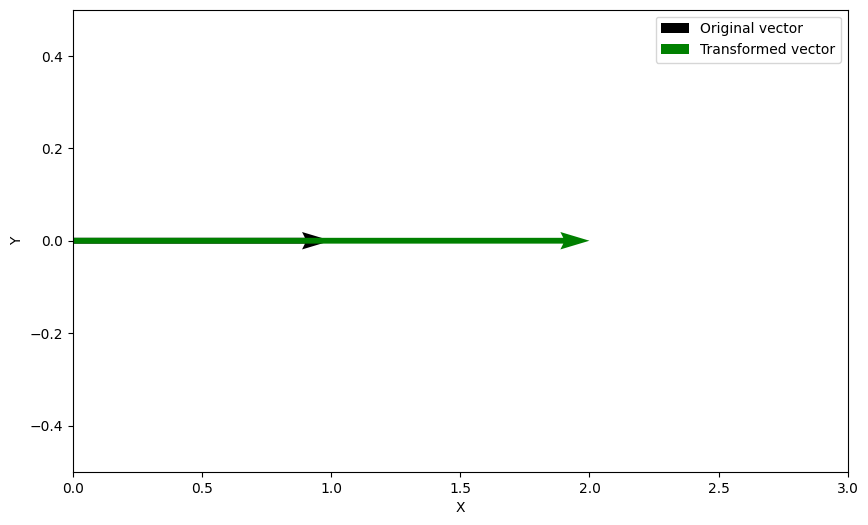

In [23]:
x = np.array([[1], [0]])
b = np.dot(A, x)

plot_vect(x,b,(0,3),(-0.5,0.5))

Agora podemos ver que com este novo vetor, a única coisa que mudou após a transformação é o comprimento do vetor, ele é esticado. O novo vetor é $[[2], [0]]$, portanto, a transformada é

$$
Ax=2x
$$

com $x = [[1], [0]]$ e $\lambda=2$. A direção do vetor não muda (sem rotação). Você também pode tentar que $[[0], [1]]$ é outro autovetor, tente verificar por si mesmo.

### A Equação Característica

Para obter os autovalores e autovetores, de $Ax = \lambda x$, podemos obter a seguinte forma:

$$
(A − \lambda I) x=0
$$

Onde $I$ é a matriz de identificação com as mesmas dimensões de $A$. Se a matriz $A − \lambda I$ tem uma inversa, então multiplique ambos os lados por $(A − \lambda I)^{−1}$, obtemos uma solução trivial $x=0$. Portanto, quando $A − \lambda I$ é singular (não existe inversa), temos uma solução não trivial, o que significa que o determinante é zero:

$$
\text{det}(A − \lambda I) = 0
$$

esta equação é chamada de equação característica, que levará a uma equação polinomial para $\lambda$, então podemos resolver para os autovalores. Vejamos um exemplo.

#### Exemplo:
Obtenha os autovalores para a matriz $[[0, 2], [2, 3]]$

**Resposta:**

A equação característica nos dá

$$
\begin{vmatrix}
0-\lambda & 2 \\ 
2 & 3-\lambda
\end{vmatrix}
=0
$$

Então, temos

$$-\lambda(3-\lambda)-4 = 0 \Rightarrow \lambda^2-3\lambda-4=0$$

Dessa forma obtemos dois autovalores

$$\lambda_1 = 4,\quad \lambda_2 = -1$$

#### Exemplo:
Calcule os autovetores associados com os autovalores acima

**Resposta:**


Vamos obter o primeiro autovetor quando $\lambda_1 = 4$, podemos simplesmente inseri-lo de volta em $A − \lambda I = 0$, onde temos:

$$
\begin{bmatrix}
-4 & 2 \\
2 & -1 \\
\end{bmatrix}
\begin{bmatrix}
x_1\\x_2\\
\end{bmatrix}
=\begin{bmatrix}
0\\0\\
\end{bmatrix}
$$

Portanto, temos duas equações $−4x_1+2x_2=0$ e $2x_1−x_2=0$, ambas indicam que $x_2=2x_1$. Portanto, podemos ter o primeiro autovetor como

$$x_1 = k_1\begin{bmatrix}
1\\2\\
\end{bmatrix}$$

$k_1$ é um vetor escalar $(k_1 \neq 0)$, desde que tenhamos a razão entre $x_2$ e $x_1$ como $2$, será um autovetor. Podemos verificar que o vetor $[[1], [2]]$ é um autovetor inserindo-o de volta:

$$
\begin{bmatrix}
0 & 2 \\
2 & 3 \\
\end{bmatrix}
\begin{bmatrix}
1\\2\\
\end{bmatrix}
=\begin{bmatrix}
4\\8\\
\end{bmatrix}
=4\begin{bmatrix}
1\\2\\
\end{bmatrix}
$$

Ao inserir $\lambda_2=−1$ da mesma forma que acima, podemos obter o outro autovetor como o seguinte, onde $k_2 \neq 0$: 

$$x_2 = k_2\begin{bmatrix}
-2\\1\\
\end{bmatrix}$$

A partir do exemplo acima, podemos ver como podemos obter os autovalores e autovetores de uma matriz $A$, e o escolhido dos autovetores para um sistema não é único. Mas as coisas se tornarão realmente complicadas quando você tiver uma matriz $A$ maior ao tentar resolver a equação característica do polinômio de enésima ordem. Felizmente, existem muitos métodos numéricos diferentes que foram desenvolvidos para resolver os problemas de autovalor para matrizes maiores. Apresentaremos o **método de potência** e o **método QR** nas próximas duas seções.

## O Método de Potência

### Encontrar o maior autovalor

Em alguns problemas, precisamos apenas encontrar o maior autovalor dominante e seu autovetor correspondente. Neste caso, podemos usar o método da potência - um método iterativo que irá convergir para o maior autovalor. Vamos ver a seguir como funciona o método de energia.

Considere uma matriz $A_{n \times n}$ que tem $n$ autovalores reais linearmente independentes $\lambda_1, \lambda_2, \dots, \lambda_n$ e os autovetores correspondentes $v_1, v_2, \dots, v_n$. Como os autovalores são escalares, podemos classificá-los de modo que $|\lambda_1| > |\lambda_2| > \dots > |\lambda_n|$ (na verdade, exigimos apenas $|\lambda_1| > |\lambda_2|$, outros autovalores podem ser iguais entre si).

Como os autovetores são independentes, eles são um conjunto de vetores de base, o que significa que qualquer vetor que esteja no mesmo espaço pode ser escrito como uma combinação linear dos vetores de base. Ou seja, para qualquer vetor $x_0$, ele pode ser escrito como:

$$ x_0 = c_1v_1+c_2v_2+\dots+c_n v_n$$

onde $c_1 \neq 0$ é a restrição. Se for zero, precisamos escolher outro vetor inicial para que $c_1 \neq 0$.

Agora vamos multiplicar ambos os lados por $A$

$$ Ax_0 = c_1Av_1+c_2Av_2+\dots+c_nAv_n$$

Como $Av_i = \lambda{v_i}$, teremos:

$$ Ax_0 = c_1\lambda_1v_1+c_2\lambda_2v_2+\dots+c_n\lambda_nv_n$$

Nós podemos mudar a equação acima para

$$ Ax_0 = c_1\lambda_1[v_1+\frac{c_2}{c_1}\frac{\lambda_2}{\lambda_1}v_2+\dots+\frac{c_n}{c_1}\frac{\lambda_n}{\lambda_1}v_n]= c_1\lambda_1x_1$$ 

onde $x_1$ é um novo vetor e 

$$x_1 = v_1+\frac{c_2}{c_1}\frac{\lambda_2}{\lambda_1}v_2+\dots+\frac{c_n}{c_1}\frac{\lambda_n}{\lambda_1}v_n.$$

Isso termina a primeira iteração. E podemos multiplicar $A$ por $x_1$ para iniciar a 2ª iteração:

$$ Ax_1 = \lambda_1{v_1}+\frac{c_2}{c_1}\frac{\lambda_2^2}{\lambda_1}v_2+\dots+\frac{c_n}{c_1}\frac{\lambda_n^2}{\lambda_1}v_n $$ 

Da mesma forma, podemos reorganizar a equação acima para:

$$ Ax_1 = \lambda_1[v_1+\frac{c_2}{c_1}\frac{\lambda_2^2}{\lambda_1^2}v_2+\dots+\frac{c_n}{c_1}\frac{\lambda_n^2}{\lambda_1^2}v_n] = \lambda_1x_2$$ 

onde $x_2$ é outro vetor novo e 

$$x_2 = v_1+\frac{c_2}{c_1}\frac{\lambda_2^2}{\lambda_1^2}v_2+\dots+\frac{c_n}{c_1}\frac{\lambda_n^2}{\lambda_1^2}v_n.$$

Podemos continuar a multiplicar $A$ com o novo vetor que obtemos de cada iteração $k$ vezes:

$$ Ax_{k-1} = \lambda_1[v_1+\frac{c_2}{c_1}\frac{\lambda_2^k}{\lambda_1^k}v_2+\dots+\frac{c_n}{c_1}\frac{\lambda_n^k}{\lambda_1^k}v_n] = \lambda_1x_k$$ 

Como $λ_1$ é o maior autovalor, portanto, a razão $\frac{\lambda_i}{\lambda_1}<1$ para todo $i>1$. Assim, quando aumentamos $k$ para um valor suficientemente grande, a razão de $(\frac{\lambda_n}{\lambda_1})^{k}$ será próxima de $0$. Assim, todos os termos que contêm essa razão podem ser desprezados à medida que $k$ cresce:

$$ Ax_{k-1} = {\lambda_1}v_1 $$

Essencialmente, como $k$ é grande o suficiente, obteremos o maior autovalor e seu autovetor correspondente. Ao implementar este método de potência, normalmente normalizamos o vetor resultante em cada iteração. Isso pode ser feito fatorando o maior elemento do vetor, o que tornará o maior elemento do vetor igual a 1. Essa normalização nos dará o maior autovalor e seu autovetor correspondente ao mesmo tempo. Vejamos o exemplo a seguir.

Você pode dizer quando devemos parar a iteração? O critério básico de parada deve ser um dos três: nas iterações consecutivas, (1) a diferença entre autovalores é menor que alguma tolerância especificada; (2) o ângulo entre autovetores é menor que um limiar; ou a norma do vetor residual é pequena o suficiente.

#### Exemplo: 
Sabemos da última seção que o maior autovalor é $4$ para a matriz $A = \begin{bmatrix}
0 & 2\\
2 & 3\\
\end{bmatrix}$, agora use o método da potência para encontrar o maior autovalor e o autovetor associado. Você pode usar o vetor inicial $[1, 1]$ para iniciar a iteração.


Primeira iteração: 
$$
\begin{bmatrix}
0 & 2\\
2 & 3\\
\end{bmatrix}
\begin{bmatrix}
1\\1\\
\end{bmatrix}
=\begin{bmatrix}
2\\5\\
\end{bmatrix}
=5\begin{bmatrix}
0.4\\1\\
\end{bmatrix}
$$

Segunda iteração:
$$
\begin{bmatrix}
0 & 2\\
2 & 3\\
\end{bmatrix}
\begin{bmatrix}
0.4\\1\\
\end{bmatrix}
=\begin{bmatrix}
2\\3.8\\
\end{bmatrix}
=3.8\begin{bmatrix}
0.5263\\1\\
\end{bmatrix}
$$

terceira iteração:
$$
\begin{bmatrix}
0 & 2\\
2 & 3\\
\end{bmatrix}
\begin{bmatrix}
0.5263\\1\\
\end{bmatrix}
=\begin{bmatrix}
2\\ 4.0526\\
\end{bmatrix}
= 4.0526\begin{bmatrix}
0.4935\\1\\
\end{bmatrix}
$$

quarta iteração:
$$
\begin{bmatrix}
0 & 2\\
2 & 3\\
\end{bmatrix}
\begin{bmatrix}
0.4935\\1\\
\end{bmatrix}
=\begin{bmatrix}
2\\ 3.987\\
\end{bmatrix}
= 3.987\begin{bmatrix}
0.5016\\1\\
\end{bmatrix}
$$

quinta iteração:
$$
\begin{bmatrix}
0 & 2\\
2 & 3\\
\end{bmatrix}
\begin{bmatrix}
0.5016\\1\\
\end{bmatrix}
=\begin{bmatrix}
2\\ 4.0032\\
\end{bmatrix}
= 4.0032\begin{bmatrix}
0.4996\\1\\
\end{bmatrix}
$$

sexta iteração:
$$
\begin{bmatrix}
0 & 2\\
2 & 3\\
\end{bmatrix}
\begin{bmatrix}
0.4996\\1\\
\end{bmatrix}
=\begin{bmatrix}
2\\ 3.9992\\
\end{bmatrix}
= 3.9992\begin{bmatrix}
0.5001\\1\\
\end{bmatrix}
$$

setima iteração:
$$
\begin{bmatrix}
0 & 2\\
2 & 3\\
\end{bmatrix}
\begin{bmatrix}
0.5001\\1\\
\end{bmatrix}
=\begin{bmatrix}
2\\ 4.0002\\
\end{bmatrix}
= 4.0002\begin{bmatrix}
0.5000\\1\\
\end{bmatrix}
$$

Podemos ver após 7 iterações, o autovalor convergiu para 4 com $[0.5, 1]$ como o autovetor correspondente.

#### Exercicio:

Implementa o método de potência no Python

**Resposta:**

In [24]:
def normalize(x):
    fac = x.max()
    #fac = abs(x).max()
    x_n = x / fac
    return fac, x_n

In [25]:
def power_method(A, x0, tol=1e-5, max_iter=100):
    iteration = 0
    error = 1000
    lambda_1, x0 = normalize(x0)

    while error > tol and iteration<max_iter:
        lambda_old = lambda_1
        x0 = np.dot(A, x0)
        lambda_1, x0 = normalize(x0)
        iteration += 1

        error = abs(lambda_1 - lambda_old)


    return lambda_1, x0


In [26]:
x0 = np.array([1, 1])
A = np.array([[0, 2], 
              [2, 3]])

power_method(A, x0)

(np.float64(4.000000794728724), array([0.4999999, 1.       ]))

### O método da potência inversa

Os autovalores da matriz inversa $A^{−1}$ são os recíprocos dos autovalores de $A$. Podemos aproveitar esse recurso assim como o método da potência para obter o menor autovalor de $A$, este será a base do método da potência inversa. Os passos são muito simples, em vez de multiplicar $A$ como descrito acima, apenas multiplicamos $A^{−1}$ para nossa iteração encontrar o maior valor de $\frac{1}{\lambda_1}$, que será o menor valor dos autovalores para $A$. Quanto à inversa da matriz , na prática, podemos usar os métodos que abordamos no capítulo anterior para calculá-lo. Não vamos entrar em detalhes aqui, mas vamos ver um exemplo.

#### Exemplo:
Encontre o menor autovalor e autovetor para $A = \begin{bmatrix}
0 & 2\\
2 & 3\\
\end{bmatrix}$. 

**Resposta:**

In [27]:
def power_method(A, x0, tol=1e-5, max_iter=100, inverse=False):
    iteration = 0
    error = float('inf')
    lambda_1, x0 = normalize(x0)

    if inverse:
        A = np.linalg.inv(A).copy()
        print("Inverse Power Method")

    while error > tol and iteration < max_iter:
        x0_old = x0
        x0 = np.dot(A, x0)
        lambda_1, x0 = normalize(x0)
        iteration += 1
        error = np.linalg.norm(x0 - x0_old)

    if inverse:
        return 1/lambda_1, x0
    if not inverse:
        return lambda_1, x0


In [28]:
x0 = np.array([1, 1])
A = np.array([[0, 2], 
              [2, 3]])
              
power_method(A, x0, max_iter=100, inverse=True)

Inverse Power Method


(np.float64(0.5), array([ 1. , -0.5]))

In [29]:
A.dot(np.array([ 1. , -0.5]))

array([-1. ,  0.5])

In [30]:
from scipy.linalg import eigh

eigh(A)

(array([-1.,  4.]),
 array([[-0.89442719,  0.4472136 ],
        [ 0.4472136 ,  0.89442719]]))

### O método de potência deslocado
Em alguns casos, precisamos encontrar todos os autovalores e autovetores em vez do maior e menor. Uma maneira simples, mas ineficiente, é usar o método de potência deslocada (apresentaremos uma maneira eficiente na próxima seção). Dado $Ax = \lambda{x}$, e $\lambda_1$ é o maior autovalor obtido pelo método da potência, então podemos ter:

$$[A - \lambda_1I]x = \alpha{x}$$

onde $\alpha$'s são os autovalores da matriz deslocada $A - \lambda_1I$, que será $0, \lambda_2-\lambda_1, \lambda_3-\lambda_1, \dots, \lambda_n-\lambda_1$.

Agora, se aplicarmos o método da potência à matriz deslocada, podemos determinar o maior autovalor da matriz deslocada, ou seja, $\alpha_k$. Como $\alpha_k = \lambda_k - \lambda_1$, podemos obter o autovalor $\lambda_k$ facilmente. Podemos repetir esse processo muitas vezes para encontrar todos os outros autovalores. Mas você pode ver que, envolve muito trabalho! Um método melhor para encontrar todos os autovalores é usar o método QR, vamos ver na próxima seção como funciona!

## O Método QR

O método QR é um método iterativo preferido para encontrar todos os autovalores de uma matriz (mas não os autovetores ao mesmo tempo). A ideia é baseada nos seguintes dois conceitos

matrizes semelhantes terão os mesmos autovalores e autovetores associados. Duas matrizes quadradas $A$ e $B$ são semelhantes se:

$$A = C^{-1}BC$$

onde $C$ é uma matriz invertível.

O método QR é uma forma de decompor uma matriz em duas matrizes $Q$ e $R$, onde $Q$ é uma matriz ortogonal e $R$ é uma matriz triangular superior. Uma matriz ortogonal tem as características: $Q^{-1} = Q^T$, que significa $Q^{-1}Q=Q^TQ=I$.

Como conectamos esses dois conceitos para encontrar os autovalores? Digamos que temos uma matriz $A_0$ cujos autovalores devem ser determinados. No $k$-ésimo passo (começando com $k=0$), podemos realizar a decomposição QR e obter $A_k = Q_kR_k$, onde $Q_k$ é uma matriz ortogonal e $R_k$ é uma matriz triangular superior. Formamos então $A_{k+1} = R_kQ_k$, que notamos que

$$A_{k+1} = R_kQ_k = Q^{-1}_kQ_kR_kQ_k = Q^{-1}_kA_kQ_k$$

portanto, todos os $A_k$ são semelhantes, como discutimos acima, todos eles têm os mesmos autovalores.

À medida que a iteração avança, eventualmente convergiremos para uma forma de matriz triangular superior:

$$ A_k = R_kQ_k = \begin{bmatrix}
\lambda_1 & X & \dots & X\\
0 & \lambda_2 & \dots & X\\
& &\dots &\\
0 & 0 & \dots & \lambda_n\\
\end{bmatrix}$$

onde os valores diagonais são os autovalores da matriz. Em cada iteração do método QR, a fatoração de uma matriz em uma matriz ortogonal e uma matriz triangular superior pode ser feita usando uma matriz especial chamada matriz de Householder. Não entraremos nos detalhes matemáticos de como você obtém $Q$ e $R$ da matriz, em vez disso, usaremos a função Python para obter as duas matrizes diretamente.

#### Exemplo: 
Use a função `qr` em `numpy.linalg` para decompor a matriz $A = \begin{bmatrix}
0 & 2\\
2 & 3\\
\end{bmatrix}$. E verifique os resultados. Depois se o método QR para obter os autovalores da matriz $A$. Faça 20 iterações e imprima a 1ª, 5ª, 10ª e 20ª iteração.

In [31]:
a = np.array([[0, 2], 
              [2, 3]])

q, r = np.linalg.qr(a)

print('Q:', q)
print('R:', r)

b = np.dot(q, r)
print('QR:', b)

Q: [[ 0. -1.]
 [-1.  0.]]
R: [[-2. -3.]
 [ 0. -2.]]
QR: [[0. 2.]
 [2. 3.]]


In [32]:
a = np.array([[0, 2], 
              [2, 3]])
p = [1, 5, 10, 20]
for i in range(20):
    q, r = np.linalg.qr(a)
    a = np.dot(r, q)
    if i+1 in p:
        print(f'Iteration {i+1}:')
        print(a)

Iteration 1:
[[3. 2.]
 [2. 0.]]
Iteration 5:
[[ 3.99998093  0.00976559]
 [ 0.00976559 -0.99998093]]
Iteration 10:
[[ 4.00000000e+00  9.53674316e-06]
 [ 9.53674316e-06 -1.00000000e+00]]
Iteration 20:
[[ 4.00000000e+00  9.09484250e-12]
 [ 9.09494702e-12 -1.00000000e+00]]


Podemos ver que após a 5ª iteração, os autovalores convergem para os corretos.

## Equação de Schrödinger independente do tempo (1D)

A equação de Schrödinger **dependente do tempo** é:

$$
i\hbar \frac{\partial \psi(x, t)}{\partial t} = -\frac{\hbar^2}{2m} \frac{\partial^2 \psi(x, t)}{\partial x^2} + V(x)\psi(x, t)
$$

Buscando soluções do tipo **separáveis**: $\psi(x, t) = \phi(x)e^{-iEt/\hbar}$, substituímos e obtemos a **forma independente do tempo**:

$$
-\frac{\hbar^2}{2m} \frac{d^2\phi(x)}{dx^2} + V(x)\phi(x) = E\phi(x)
$$



### Poço infinito de potencial (a "caixa")

Neste modelo, temos:

* Partícula presa entre $x = 0$ e $x = L$
* Potencial $V(x)$ é definido por:

$$
V(x) = \begin{cases}
0, & \text{se } 0 < x < L \\
\infty, & \text{se } x \leq 0 \text{ ou } x \geq L
\end{cases}
$$

**Consequência**: a função de onda $\phi(x)$ deve obedecer:

$$
\phi(0) = \phi(L) = 0
$$


### Forma matemática do problema

Dentro da caixa $(0 < x < L)$, temos:

$$
-\frac{\hbar^2}{2m} \frac{d^2\phi(x)}{dx^2} = E\phi(x)
$$

Multiplicando ambos os lados por $-\frac{2m}{\hbar^2}$:

$$
\frac{d^2\phi(x)}{dx^2} + \frac{2mE}{\hbar^2} \phi(x) = 0
$$

Definindo:

$$
k^2 = \frac{2mE}{\hbar^2}
\quad \Rightarrow \quad \phi''(x) + k^2 \phi(x) = 0
$$


### Isso é um **problema de autovalores**!

Forma geral:

$$
\phi''(x) + \lambda \phi(x) = 0
\quad \text{com } \phi(0) = \phi(L) = 0
$$

Queremos encontrar:

* Os **autovalores** $\lambda = k^2 = \frac{2mE}{\hbar^2}$
* E as **autofunções** $\phi(x)$


### Solução analítica

Solução geral da EDO homogênea:

$$
\phi(x) = A\sin(kx) + B\cos(kx)
$$

Aplicando $\phi(0) = 0 \Rightarrow B = 0$

Aplicando $\phi(L) = 0 \Rightarrow \sin(kL) = 0 \Rightarrow kL = n\pi \Rightarrow k = \frac{n\pi}{L}$

Logo:

* Autovalores:

  $$
  E_n = \frac{\hbar^2 k^2}{2m} = \frac{n^2 \pi^2 \hbar^2}{2m L^2}, \quad n = 1,2,3,...
  $$
* Autofunções:

  $$
  \phi_n(x) = A_n \sin\left( \frac{n\pi x}{L} \right)
  $$

### Interpretação física

- **$E_n$**: Níveis de energia **quantizados** da partícula na caixa.
- **$\phi_n(x)$**: Função de onda — descreve a amplitude de probabilidade de encontrar a partícula na posição $x$.
- **$|\phi_n(x)|^2$**: Densidade de probabilidade — indica a chance de encontrar a partícula em $x$ (quanto maior, mais provável).



### Conexão com **diferenças finitas**

Para resolver numericamente:

1. Discretizamos o intervalo $[0, L]$ com $n$ pontos internos
2. Aproximamos $\phi''(x) \approx \frac{\phi_{i-1} - 2\phi_i + \phi_{i+1}}{h^2}$
3. O sistema linear fica:

$$
-\frac{\hbar^2}{2m} D \vec{\phi} = E \vec{\phi}
$$

onde $D$ é uma **matriz tridiagonal simétrica** (matriz do Laplaciano discreto).

Isso vira um **problema de autovalores matricial**:

$$
A \vec{\phi} = E \vec{\phi}
$$

com:

$$
A = -\frac{\hbar^2}{2m} \cdot \frac{1}{h^2}
\begin{bmatrix}
2 & -1 & 0 & \cdots & 0 \\
-1 & 2 & -1 & \cdots & 0 \\
0 & -1 & 2 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & \cdots & 0 & -1 & 2
\end{bmatrix}
$$

Os autovalores dessa matriz aproximam os $E_n$, e os autovetores são amostras das autofunções $\phi_n(x)$.

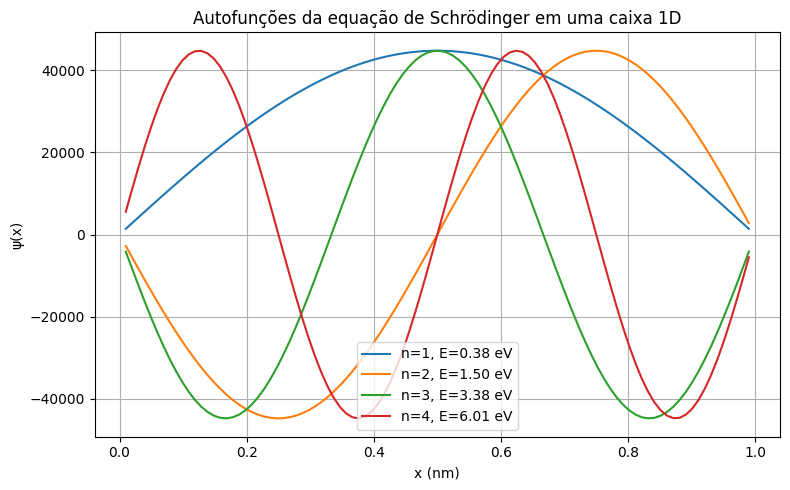

array([0.37599985, 1.50363563, 3.38181643, 6.00872523])

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar, electron_mass, electron_volt
from numpy.linalg import eigh

# Constants
L = 1e-9  # width of the potential well in meters (1 nm)
n_points = 100  # number of internal grid points
m = electron_mass  # mass of particle (electron)

# Grid setup
x = np.linspace(0, L, n_points + 2)  # include boundaries
h = x[1] - x[0]

# Construct the finite-difference Laplacian (tridiagonal matrix)
diag = 2.0 * np.ones(n_points)
off_diag = -1.0 * np.ones(n_points - 1)
laplacian = (np.diag(diag) + np.diag(off_diag, -1) + np.diag(off_diag, 1))

# Hamiltonian operator matrix (kinetic energy only)
prefactor = hbar**2 / (2 * m * h**2)
H = prefactor * laplacian

# Solve the eigenvalue problem
eigenvalues, eigenvectors = eigh(H)

# Convert energy to eV
eigenvalues_ev = eigenvalues / electron_volt

# Select the first 4 eigenstates
num_levels = 4
x_internal = x[1:-1]  # exclude boundary points
phi = eigenvectors[:, :num_levels]

# Normalize wavefunctions
phi_normalized = phi / np.sqrt(h)

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
for i in range(num_levels):
    ax.plot(x_internal * 1e9, phi_normalized[:, i], label=f'n={i+1}, E={eigenvalues_ev[i]:.2f} eV')
ax.set_title("Autofunções da equação de Schrödinger em uma caixa 1D")
ax.set_xlabel("x (nm)")
ax.set_ylabel("ψ(x)")
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

eigenvalues_ev[:num_levels]


A imagem mostra as **quatro primeiras autofunções** $\phi_n(x)$ da equação de Schrödinger para uma partícula confinada em uma **caixa 1D de largura $L = 1\,\text{nm}$** com paredes infinitas.

Essas funções obedecem $\phi_n(0) = \phi_n(L) = 0$, e são similares a senos múltiplos de $\pi x / L$.

Os **autovalores de energia** correspondentes (em elétron-volts) são:

$$
\begin{aligned}
E_1 &\approx 0{,}376 \, \text{eV} \\
E_2 &\approx 1{,}504 \, \text{eV} \\
E_3 &\approx 3{,}382 \, \text{eV} \\
E_4 &\approx 6{,}009 \, \text{eV}
\end{aligned}
$$

Que confirmam o padrão esperado:

$$
E_n \propto n^2
$$



### Problemas de Contorno para Equações Diferenciais Ordinárias

A figura abaixo mostra um sistema físico que pode servir como contexto para o
exame desse tipo de problema.

<p align="center">
<img src="./images/9-eigen.png" width=300 height=300 />
</p>


A curvatura de uma coluna delgada sujeita a uma carga axial P pode ser modelada por

\begin{align*}
\frac{d^2y}{dx^2} = \frac{M}{EI}
\end{align*}

onde $\frac{d^2y}{dx^2}$ especifica a curvatura, $M$ é o momento fletor, $E$ é o modo de elasticidade e $I$ é o momento de inércia da secção transversal em torno de seu eixo neutro. Considerando o corpo livre na figura, é claro que o momento fletor em $x$ é $M = −Py$.
Substituindo esse valor na equação acima, temos

\begin{align*}
\frac{d^2y}{dx^2} = p^2 y
\end{align*}

onde

\begin{align*}
p^2 = \frac{P}{EI}
\end{align*}

Para o sistema na figura, sujeito às condições de contorno

\begin{align*}
y(0) &= 0\\
y(L) &= 0
\end{align*}

a solução geral da equação é

$$
y = A \sin(px) + B \cos(px)
$$

onde $A$ e $B$ são constantes arbitrárias que devem ser calculadas por meio das condições de
contorno. De acordo com a primeira condição

$$
0 = A \sin(0) + B \cos(0)
$$

Portanto, concluímos que $B = 0$.

De acordo com a segunda condição

$$
0 = A \sin(pL) + B \cos(pL)
$$

Mas, como $B = 0, A \sin ( pL) = 0$. Como $A = 0$ representaria uma solução trivial, concluímos que $\sin ( pL) = 0$. Para essa igualdade ser válida,

$$
pL = n\pi \qquad \text{ para } n= 1, 2, 3, \cdots
$$

Logo, existe um número infinito de valores que satisfazem as condições de contorno. A
equação acima pode ser resolvida por

$$
p = \frac{n\pi}{L} \qquad \text{ para } n= 1, 2, 3, \cdots
$$
que são os autovalores para a coluna.

<p align="center">
<img src="./images/9-eigen2.png" width=350 height=500 />
</p>


A figura acima, que mostra a solução para os primeiros quatro autovalores, pode
fornecer uma percepção do significado físico dos resultados. Cada autovalor corresponde
a uma maneira pela qual a coluna se deforma. Combinando as equações , obtemos

$$
P = \frac{n^2 \pi^2 E I}{L^2} \qquad \text{ para } n= 1, 2, 3, \cdots
$$

Isso pode ser pensado como *cargas de deformação*, pois elas representam o nível no qual
a coluna se move em cada configuração sucessiva de deformação. No sentido prático, em
geral, é o primeiro valor que tem interesse, porque a falha geralmente acontecerá quando
a coluna se deformar inicialmente. Assim, uma carga crítica pode ser definida como

$$
P = \frac{\pi^2 E I}{L^2}
$$

a qual é formalmente conhecida como *fórmula de Euler*.

##### Exemplo:
Uma coluna de madeira sob carga axial tem as seguintes características: $E = 10 \times 10^9 Pa, I = 1.25 \times 10^{−5} m^4, \text{ e } L = 3 m$. Determine os primeiros oito autovalores e as correspondentes cargas de deformação.

**Resposta**

<p align="center">
<img src="./images/9-eigen3.png" width=350 height=300 />
</p>


Embora as soluções analíticas do tipo que se obteve anteriormente sejam úteis, elas,
em geral, são difíceis ou impossíveis de obter. Isso normalmente é verdade quando se
trata de sistemas complicados ou daqueles com propriedades heterogêneas. Em tais casos,
os métodos numéricos do tipo descrito a seguir são a única alternativa prática.



#### Método Polinomial

A equação 

\begin{align*}
\frac{d^2y}{dx^2} = p^2 y
\end{align*}

pode ser resolvida numericamente substituindo a segunda derivada por uma aproximação por diferença finita dividida centrada. Dessa forma,

$$
\frac{y_{i+1} - 2y_i + y_{i-1}}{h^2} + p^2 y_i = 0
$$

o que pode ser expresso por

$$
y_{i-1} - (2- h^2p^2)y_i + y_{i+1} = 0
$$

Escrevendo essa equação para uma série de nós ao longo do eixo da coluna, obtemos um
sistema homogêneo de equações. Por exemplo, se a coluna for dividida em cinco segmentos (isto é, quatro nós interiores), o resultado é

$$
\begin{bmatrix}
(2-h^2p^2) & -1 & 0 & 0 \\
-1 & (2-h^2p^2) & -1 & 0 \\
0 & -1 & (2-h^2p^2) & -1 \\
0 & 0 & -1 & (2-h^2p^2)
\end{bmatrix} 
\begin{bmatrix}
y_1\\
y_2\\
y_3\\
y_4
\end{bmatrix}
=0
$$

A expansão do determinante do sistema fornece um polinômio, cujas raízes são os autovalores. Essa abordagem, chamada *método polinomial*, é adotada no seguinte exemplo.

##### Example: 

Use o método polinomial para determinar os autovalores para a coluna com carga axial do Exemplo anterior, usando 
- (a) um, 
- (b) dois, 
- (c) três e 
- (d) quatro
nós interiores.

**Resposta:**


* (a) Escrevendo a equação discritizada para um nó interior, obtemos $(h = 3/2)$

    $$
    -(2-2.252p^2)y_1 = 0
    $$

    Logo, nesse caso simples, o autovalor é analisado igualando-se o determinante a zero

    $$
    2-2.252p^2 = 0
    $$

    e resolvendo por $p = \pm 0.9428$, o que é cerca de $10\%$ menor que o valor exato de
    $1.0472$ obtido no Exemplo anterior

* (b) Para dois nós interiores $(h = 3/3)$

    $$
    \begin{bmatrix}
    (2-p^2) & -1\\
    -1 & (2-p^2)
    \end{bmatrix}
    \begin{bmatrix}
    y_1\\
    y_2
    \end{bmatrix}
    =0
    $$

    A expansão do determinante fornece

    $$(2 − p^2 )^2 − 1 = 0$$

    que pode ser resolvido por $p = \pm 1$ e $\pm 1.73205$. Logo, o primeiro autovalor é agora
    baixo por aproximadamente $4.5\%$ e é obtido um segundo autovalor que é baixo por cerca de $17\%$.

* (c) Para três pontos interiores $(h = 3/4)$

    $$
    \begin{bmatrix}
    (2-0.5625p^2) & -1 & 0\\
    -1 & (2-0.5625p^2) & -1\\
    0 & -1 & (2-0.5625p^2)\\
    \end{bmatrix}
    \begin{bmatrix}
    y_1\\
    y_2\\
    y_3
    \end{bmatrix}
    =0
    $$

    O determinante pode ser igualado a zero e expandido para fornecer

    $$
    (2 − 0.5625 p^2 )^3 − 2(2 − 0.5625 p^2 ) = 0
    $$

    Para essa equação ser válida, $2 − 0.5625p^2 = 0$ ou $2 − 0.5625p^2 = \sqrt 2$
    podemos determinar que os três primeiros autovalores são

    + $p = \pm 1.0205  \qquad |\alpha_t| = 2.5\%$
    + $p = \pm 1.8856  \qquad |\alpha_t| = 10\%$
    + $p = \pm 2.4637  \qquad |\alpha_t| = 22\%$

* (d) Para quatro pontos interiores $(h = 3/5)$, o resultado é $2 − 0.36p^2$ na diagonal Igualando-se o determinante a zero e expandindo, obtemos 

    $$
    (2 − 0.36 p^2 )^4 − 3(2 − 0.36 p^2 )^2 + 1 = 0
    $$

    que pode ser resolvido para determinar os primeiros quatro autovalores

    + $p = \pm 1.0301  \qquad |\alpha_t| = 1.6\%$
    + $p = \pm 1.9593  \qquad |\alpha_t| = 6.5\%$
    + $p = \pm 2.6967  \qquad |\alpha_t| = 14\%$
    + $p = \pm 3.1702  \qquad |\alpha_t| = 24\%$

#### Metodo da Potencia

##### Exemplo:
Use o método da potência para determinar o maior autovalor para a parte (c) do Exemplo anterior.

**Resposta**

Primeiro precisamos de escrever o sistema no formato

$$
[A]\{X\} = \lambda \{X\}
$$

Para fazer isso temos que reescrever a equação diferencial na forma

$$
-y_{i+1} + 2y_i - y_{i-1} = h^2 p^2 y_i
$$

Agora a parte (c) pode ser escrito como

\begin{align*}
-y_2 + 2y_1 + 0 &= (0.75)^2 p^2 y_1\\
-y_3 + 2y_2 - y_1 &= (0.75)^2 p^2 y_2\\
0 + 2y_3 - y_2 &= (0.75)^2 p^2 y_3
\end{align*}

Ou seja

$$
\begin{bmatrix}
3.556 & -1.778 & 0 \\
-1.778 & 3.556 & -1.778\\
0 & -1.788 & 3.556 
\end{bmatrix}
\begin{bmatrix}
y_1\\
y_2\\
y_3
\end{bmatrix}
= p^2 
\begin{bmatrix}
y_1\\
y_2\\
y_3
\end{bmatrix}
$$

Agora podemos usar a função que desenvolvemos anteriormente para achar o maior auto valor do sistema

In [34]:
A = np.array([[3.556, -1.778, 0], [-1.778, 3.556, -1.778], [0, -1.778, 3.556]])
x0 = np.array([1,1,1])
cn.power_method(A, x0)

(np.float64(6.070471065989848), array([ 1.       , -1.4142135,  1.       ]))

Para verificar o resultado

In [35]:
A.dot(np.array([ 1.       , -1.4142135,  1.       ]))

array([ 6.0704716 , -8.58494321,  6.0704716 ])

Assim, o fator normalizador está convergindo para o valor $6.070 (= (2.46372)^2)$ obtido
na parte (c) do Exemplo.

Observe que existem alguns casos nos quais o método da potência convergirá para
o segundo maior autovalor em vez do maior. James, Smith e Wolford (1985) forneceram uma ilustração de tal caso. Outros casos especiais são discutidos em Fadeev e
Fadeeva (1963).

##### Example:
Utilize o método da potência para determinar o menor autovalor para a parte (c) do Exemplo

**resposta**

Dessa maneira, depois de apenas três iterações, o resultado está convergindo para
o valor $0.9602$, que é o inverso do menor autovalor, $1,0205(= \sqrt{1/0.9602})$, obtido no
Exemplo.


##### Exercicio:

Use o metodo QR para achar todos os autovalores do sistema da parte (c) do Exemplo.



## 2. Poço infinito de potencial (a "caixa")

Neste modelo, temos:

* Partícula presa entre $x = 0$ e $x = L$
* Potencial $V(x)$ é definido por:

$$
V(x) = \begin{cases}
0, & \text{se } 0 < x < L \\
\infty, & \text{se } x \leq 0 \text{ ou } x \geq L
\end{cases}
$$

**Consequência**: a função de onda $\phi(x)$ deve obedecer:

$$
\phi(0) = \phi(L) = 0
$$

---

## 3. Forma matemática do problema

Dentro da caixa $(0 < x < L)$, temos:

$$
-\frac{\hbar^2}{2m} \frac{d^2\phi(x)}{dx^2} = E\phi(x)
$$

Multiplicando ambos os lados por $-\frac{2m}{\hbar^2}$:

$$
\frac{d^2\phi(x)}{dx^2} + \frac{2mE}{\hbar^2} \phi(x) = 0
$$

Definindo:

$$
k^2 = \frac{2mE}{\hbar^2}
\quad \Rightarrow \quad \phi''(x) + k^2 \phi(x) = 0
$$

---

## 4. Isso é um **problema de autovalores**!

Forma geral:

$$
\phi''(x) + \lambda \phi(x) = 0
\quad \text{com } \phi(0) = \phi(L) = 0
$$

Queremos encontrar:

* Os **autovalores** $\lambda = k^2 = \frac{2mE}{\hbar^2}$
* E as **autofunções** $\phi(x)$

---

## 5. Solução analítica

Solução geral da EDO homogênea:

$$
\phi(x) = A\sin(kx) + B\cos(kx)
$$

Aplicando $\phi(0) = 0 \Rightarrow B = 0$

Aplicando $\phi(L) = 0 \Rightarrow \sin(kL) = 0 \Rightarrow kL = n\pi \Rightarrow k = \frac{n\pi}{L}$

Logo:

* Autovalores:

  $$
  E_n = \frac{\hbar^2 k^2}{2m} = \frac{n^2 \pi^2 \hbar^2}{2m L^2}, \quad n = 1,2,3,...
  $$
* Autofunções:

  $$
  \phi_n(x) = A_n \sin\left( \frac{n\pi x}{L} \right)
  $$

---

## 6. Interpretação física

| Quantidade  | Interpretação                                                  |      |                                      |
| ----------- | -------------------------------------------------------------- | ---- | ------------------------------------ |
| $E_n$       | Os níveis de energia **quantizados** da partícula              |      |                                      |
| $\phi_n(x)$ | Função de onda (probabilidade de encontrar a partícula em $x$) |      |                                      |
| (           | \phi\_n(x)                                                     | ^2 ) | Densidade de probabilidade no espaço |

---

## Conexão com **diferenças finitas**

Para resolver numericamente:

1. Discretizamos o intervalo $[0, L]$ com $n$ pontos internos
2. Aproximamos $\phi''(x) \approx \frac{\phi_{i-1} - 2\phi_i + \phi_{i+1}}{h^2}$
3. O sistema linear fica:

$$
-\frac{\hbar^2}{2m} D \vec{\phi} = E \vec{\phi}
$$

onde $D$ é uma **matriz tridiagonal simétrica** (matriz do Laplaciano discreto).

Isso vira um **problema de autovalores matricial**:

$$
A \vec{\phi} = E \vec{\phi}
$$

com:

$$
A = -\frac{\hbar^2}{2m} \cdot \frac{1}{h^2}
\begin{bmatrix}
2 & -1 & 0 & \cdots & 0 \\
-1 & 2 & -1 & \cdots & 0 \\
0 & -1 & 2 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & \cdots & 0 & -1 & 2
\end{bmatrix}
$$

Os autovalores dessa matriz aproximam os $E_n$, e os autovetores são amostras das autofunções $\phi_n(x)$.

